In [2]:
import numpy as np 
import matplotlib.pyplot as plt


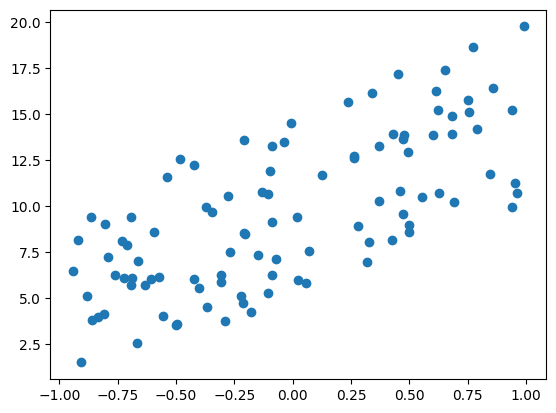

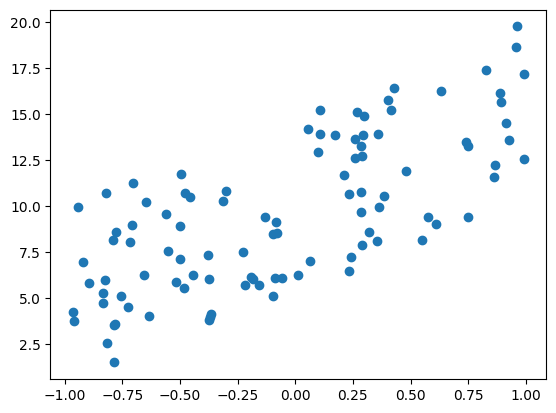

In [3]:
n = 100

d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],[5]])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
plt.scatter(x[:,0],y_true)
plt.show()
plt.scatter(x[:,1],y_true)

class Linear:
    def __init__(self,input_dim,units=1):
        self.weight=np.random.randn(d,units)
        self.bias=np.zeros(units,)
        
        ## here weight dimension is = dimension by 1  
        # if dimension of feature vector is =nxd  and out vector is =1
        # then weight vector shape is = dx1
        # bias vector shape is =1
        
    def forward(self,X):
        # here our weight vector shape is = dx1 
        # feature vector shape is         =nxd
        # so output vector shape is       =nxd * dx1 =nx1 
        # so multiplication must be feature vector * weight vector =nxd * dx1 =nx1
        
        return X@self.weight+self.bias    
        


In [4]:





class MSE:
    def __call__(self,y_true,y_pred):
        self.y_true=y_true
        self.y_pred=y_pred
        return np.mean(np.square(np.subtract(y_pred,y_true)))
    def backward(self):
        # calculate the derivative of loss with respect to y_predict 
        # loss= (yi-y_pred_i)**2  
        # loss= (y-y_pred)**2      broadcasting 
        
        # del_L/del_y_predict= 2* (y-y_pred)/n         ;n is the number of features     as x^2= 2x
        # shape of dl-da is nx1 like y_predict shape
        
        dL_da=2*np.subtract(self.y_pred,self.y_true)/self.y_pred.shape[0]
        return dL_da

ipnput---X 


y_pred=X*W+b

L--(y_pred-y_true) ** 2

dl/da=2 *(y_pred-y_true)/n

da/dw=x

da/db=1

dl/dw=(dl/da) * (da/dw)

dl/db=(dl/da)* 1

dl/da-- calculate in MSE or loss function or loss class    shape is nx1   ; n is the number of inputs


and dl-db  and dl-dw calculate the  Linear class  


loss class return the dl/da  
 
 linear class input the dl/da by loss class then multiply the dl-da * da-dw       and dl-da * da-db

Epoch 0, loss 111.05351586978715
Epoch 10, loss 78.98173426286046
Epoch 20, loss 56.99666023809627
Epoch 30, loss 41.80848285645639
Epoch 40, loss 31.215752039693957
Epoch 50, loss 23.743377264020026
Epoch 60, loss 18.40127367194156
Epoch 70, loss 14.523416437227898
Epoch 80, loss 11.660488761638337
Epoch 90, loss 9.508254288240865
Epoch 100, loss 7.859745518340916
Epoch 110, loss 6.573331869522418
Epoch 120, loss 5.551377878086888
Epoch 130, loss 4.725965886107542
Epoch 140, loss 4.049332984593273
Epoch 150, loss 3.4874553277310083
Epoch 160, loss 3.015735002873052
Epoch 170, loss 2.616092603652207
Epoch 180, loss 2.27500059256954
Epoch 190, loss 1.982147158464192
Epoch 200, loss 1.7295233641220966
Epoch 210, loss 1.510795126036316
Epoch 220, loss 1.320867424538629
Epoch 230, loss 1.1555787401609317
Epoch 240, loss 1.0114841372904682
Epoch 250, loss 0.8856990586302348
Epoch 260, loss 0.7757850128650723
Epoch 270, loss 0.6796644391276121
Epoch 280, loss 0.595556119189131
Epoch 290, los

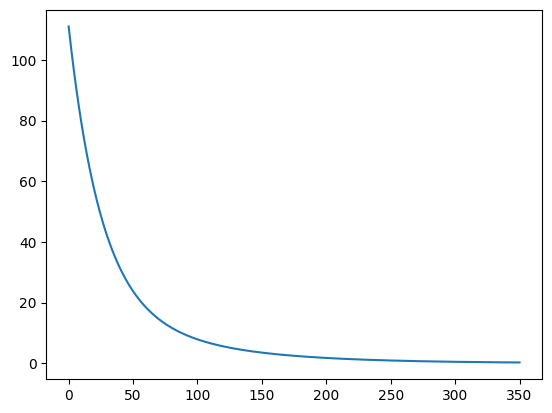

In [5]:
class MSE:
    def __call__(self,y_pred,y_true):
        # shape of y_pred and shape of y_true = number of example x1 =nx1
        self.y_true=y_true
        self.y_pred=y_pred
        return np.mean(np.square(np.subtract(y_pred,y_true)))
        
    
    def backward(self):
        # calculate the derivative of loss with respect to y_predict 
        # loss= (yi-y_pred_i)**2  
        # loss= (y-y_pred)**2      broadcasting 
        
        # del_L/del_y_predict= 2* (y-y_pred)/n         ;n is the number of features     as x^2= 2x
        # shape of dl-da is nx1 like y_predict shape
        n = self.y_true.shape[0]
        #self.dl_da= 2. * (self.y_pred - self.y_true) / n
        self.dl_da=2*np.subtract(self.y_pred,self.y_true)/n
        return self.dl_da
    
 


class Linear:
    def __init__(self,input_dim:int,units:int =1):
        self.weight=np.random.randn(input_dim,units)*np.sqrt(2./units)
        self.bias=np.zeros(units)
        
        ## here weight dimension is = dimension by 1  
        # if dimension of feature vector is =nxd  and out vector is =1
        # then weight vector shape is = dx1
        # bias vector shape is =1
        
    def __call__(self,X):
        # here our weight vector shape is = dx1 
        # feature vector shape is         =nxd
        # so output vector shape is       =nxd * dx1 =nx1 
        # so multiplication must be feature vector * weight vector =nxd * dx1 =nx1
        self.x=X
       
        output = X @ self.weight + self.bias
        return output
        
        #return self.x@self.weight+self.bias  
    
    def backward(self,dl_da):
        # dl/da comes from loss class 
        # shape of dl-da is= nx1 
        # shape of x is =nxd
        # output must be as weight shape =dx1
        # X.T shape is dxn 
        # out shape is of dl-dw = dxn * nx1=dx1
        # weights shape=dx1   dl_da shape is nx1
        #dl_da -(nx1) * transpose of weight (1xd) =nxd    dl_dx for mlp 
        self.dl_dw=self.x.T@dl_da
        self.dl_db=dl_da.sum(axis=0)
        self.dx=dl_da@ self.weight.T # nxd
        
 
        return self.dx
    def update(self,lr=0.01):
        self.weight=self.weight-lr*self.dl_dw
        self.bias=self.bias-lr*self.dl_db
      
        




        
        
#model=Linear(x.shape[1])      
#loss = MSE()        

    
def fit(x,y,model,loss,num_epochs=50,lr=0.01,visualize_epoch=False,visualize_first_last=False):
    if (visualize_epoch or visualize_first_last)==True:
        plt.scatter(x,y,label='y_true',color='r')
    j_history=[]    
    for epoch in range(num_epochs+1):
            
        y_pred=model(x)
        los_val=loss(y_pred,y)
        j_history.append(los_val)
        dl_da=loss.backward()
        model.backward(dl_da)
        model.update(lr)
        
        if visualize_epoch==True:
            
            if epoch%10==0:
                
                print(f'Epoch {epoch}, loss {los_val}')
                #plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')
                plt.plot(x[:,0], y_pred.squeeze(), label=f'Epoch {epoch}')
                plt.show()
        else:
            if epoch%10==0:
            
                print(f'Epoch {epoch}, loss {los_val}')
            
        
        
        
        
    
        
    if (visualize_epoch or visualize_first_last)==True:
        plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");
    return j_history    
model=Linear(x.shape[1])
loss=MSE()
history=fit(x,y_true,model,loss,350,0.01)
plt.plot(history)

Pytorch